The support for a set of items is the proportion of all transactions that contain the set.

Confidence is the support for the co-occurrence of all items in a rule, condi- tional on the support for the left-hand set alone. Thus, confidence(X ⇒ Y ) = support(X ∩Y)/support(X) (where “∩” means “and”). 

Perhaps the most popular measure is lift, the support of a set conditional on the joint supportofeachelement,orlift(X ⇒Y)=support(X∩Y)/(support(X)support(Y)).

These three measures tell us different things. When we search for rules we wish to exceed a minimum threshold on each: to find item sets that occur relatively fre- quently in transactions (support), that show strong conditional relationships (con- fidence), and that are more common than chance (lift).

### Retail Transaction Data: Market Baskets

In [1]:
library(arules)
data("Groceries")
summary(Groceries)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    %in%, abbreviate, write



transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meet and sausage
2     sausage sausage meet and sausage
3  live

In [2]:
inspect(head(Groceries, 3))

  items                
1 {citrus fruit,       
   semi-finished bread,
   margarine,          
   ready soups}        
2 {tropical fruit,     
   yogurt,             
   coffee}             
3 {whole milk}         


In [3]:
groc.rules <- apriori(Groceries, parameter=list(supp=0.01, conf=0.3, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.3    0.1    1 none FALSE            TRUE    0.01      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [125 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [4]:
inspect(subset(groc.rules, lift > 3))

    lhs                                  rhs                support   
32  {beef}                            => {root vegetables}  0.01738688
90  {citrus fruit,root vegetables}    => {other vegetables} 0.01037112
91  {citrus fruit,other vegetables}   => {root vegetables}  0.01037112
100 {tropical fruit,root vegetables}  => {other vegetables} 0.01230300
101 {tropical fruit,other vegetables} => {root vegetables}  0.01230300
    confidence lift    
32  0.3313953  3.040367
90  0.5862069  3.029608
91  0.3591549  3.295045
100 0.5845411  3.020999
101 0.3427762  3.144780


#### Supermarket Data

In [5]:
retail.raw <- readLines("http://fimi.ua.ac.be/data/retail.dat")

In [6]:
head(retail.raw)
tail(retail.raw)

[1] "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 "
[2] "30 31 32 "                                                                       
[3] "33 34 35 "                                                                       
[4] "36 37 38 39 40 41 42 43 44 45 46 "                                               
[5] "38 39 47 48 "                                                                    
[6] "38 39 48 49 50 51 52 53 54 55 56 57 58 "

[1] "48 201 255 278 407 479 767 824 986 1395 1598 2022 2283 2375 6725 13334 14006 14099 "                          
[2] "39 875 2665 2962 12959 14070 14406 15518 16379 "                                                              
[3] "39 41 101 346 393 413 479 522 586 635 695 799 1466 1786 1994 2449 2830 3035 3591 3722 6217 11493 12129 13033 "
[4] "2310 4267 "                                                                                                   
[5] "39 48 2528 "                                                                                                  
[6] "32 39 205 242 1393 "

In [7]:
summary(retail.raw)

   Length     Class      Mode 
    88162 character character 

In [8]:
retail.list <- strsplit(retail.raw, " ")
names(retail.list) <- paste("Trans", 1:length(retail.list), sep="")

In [9]:
str(retail.list)

List of 88162
 $ Trans1    : chr [1:30] "0" "1" "2" "3" ...
 $ Trans2    : chr [1:3] "30" "31" "32"
 $ Trans3    : chr [1:3] "33" "34" "35"
 $ Trans4    : chr [1:11] "36" "37" "38" "39" ...
 $ Trans5    : chr [1:4] "38" "39" "47" "48"
 $ Trans6    : chr [1:13] "38" "39" "48" "49" ...
 $ Trans7    : chr [1:6] "32" "41" "59" "60" ...
 $ Trans8    : chr [1:3] "3" "39" "48"
 $ Trans9    : chr [1:6] "63" "64" "65" "66" ...
 $ Trans10   : chr [1:2] "32" "69"
 $ Trans11   : chr [1:4] "48" "70" "71" "72"
 $ Trans12   : chr [1:8] "39" "73" "74" "75" ...
 $ Trans13   : chr [1:8] "36" "38" "39" "41" ...
 $ Trans14   : chr [1:3] "82" "83" "84"
 $ Trans15   : chr [1:5] "41" "85" "86" "87" ...
 $ Trans16   : chr [1:15] "39" "48" "89" "90" ...
 $ Trans17   : chr [1:5] "36" "38" "39" "48" ...
 $ Trans18   : chr [1:9] "39" "41" "102" "103" ...
 $ Trans19   : chr [1:5] "38" "39" "41" "109" ...
 $ Trans20   : chr [1:9] "39" "111" "112" "113" ...
 $ Trans21   : chr [1:15] "119" "120" "121" "122" ...
 $ Tr

In [10]:
library(car)
some(retail.list) 


Attaching package: ‘car’

The following object is masked from ‘package:arules’:

    recode



$Trans5043
[1] "3717" "7095" "7096"

$Trans16969
 [1] "41"   "48"   "65"   "201"  "258"  "352"  "479"  "535"  "573"  "676" 
[11] "760"  "812"  "856"  "899"  "910"  "1004" "1444" "1459" "1859" "2250"
[21] "2487" "2732" "2883" "3370" "3374" "4085" "4157" "5142" "6386" "9646"

$Trans22906
[1] "806"   "2798"  "3497"  "9605"  "10414"

$Trans38399
[1] "2"   "18"  "38"  "39"  "170"

$Trans43125
 [1] "31"    "39"    "156"   "237"   "255"   "375"   "389"   "414"   "764"  
[10] "905"   "922"   "1369"  "2054"  "2881"  "3577"  "4032"  "4282"  "4294" 
[19] "4832"  "5078"  "6207"  "6502"  "10459" "11697" "13536" "13786" "13787"

$Trans54472
 [1] "39"    "48"    "101"   "108"   "229"   "260"   "467"   "697"   "1158" 
[10] "3772"  "10573" "14651"

$Trans58671
 [1] "23"    "39"    "48"    "185"   "754"   "1027"  "1308"  "1703"  "1784" 
[10] "1855"  "1903"  "2091"  "2440"  "2754"  "3189"  "3361"  "4064"  "4112" 
[19] "5178"  "5350"  "6738"  "6789"  "10651" "10690" "10917" "12983" "14637"

$Trans70076
[1] "38"   "39"   "170"  "413"  "522"  "604"  "916"  "1417" "3240"

$Trans75360
[1] "186"   "2420"  "4800"  "5902"  "6783"  "10490" "15690" "15783"

$Trans76259
[1] "36"    "38"    "39"    "41"    "48"    "225"   "3838"  "13049"

In [11]:
retail.trans <- as(retail.list, "transactions")   # takes a few seconds
summary(retail.trans)

transactions as itemMatrix in sparse format with
 88162 rows (elements/itemsets/transactions) and
 16470 columns (items) and a density of 0.0006257289 

most frequent items:
     39      48      38      32      41 (Other) 
  50675   42135   15596   15167   14945  770058 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
3016 5516 6919 7210 6814 6163 5746 5143 4660 4086 3751 3285 2866 2620 2310 2115 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
1874 1645 1469 1290 1205  981  887  819  684  586  582  472  480  355  310  303 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 272  234  194  136  153  123  115  112   76   66   71   60   50   44   37   37 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  33   22   24   21   21   10   11   10    9   11    4    9    7    4    5    2 
  65   66   67   68   

In [12]:
rm(retail.list)

### Finding and Visualizing Association Rules

In [13]:
retail.rules <- apriori(retail.trans, parameter=list(supp=0.001, conf=0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.4    0.1    1 none FALSE            TRUE   0.001      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[16470 item(s), 88162 transaction(s)] done [0.16s].
sorting and recoding items ... [2117 item(s)] done [0.02s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 6 done [0.18s].
writing ... [5944 rule(s)] done [0.01s].
creating S4 object  ... done [0.05s].


Loading required package: grid


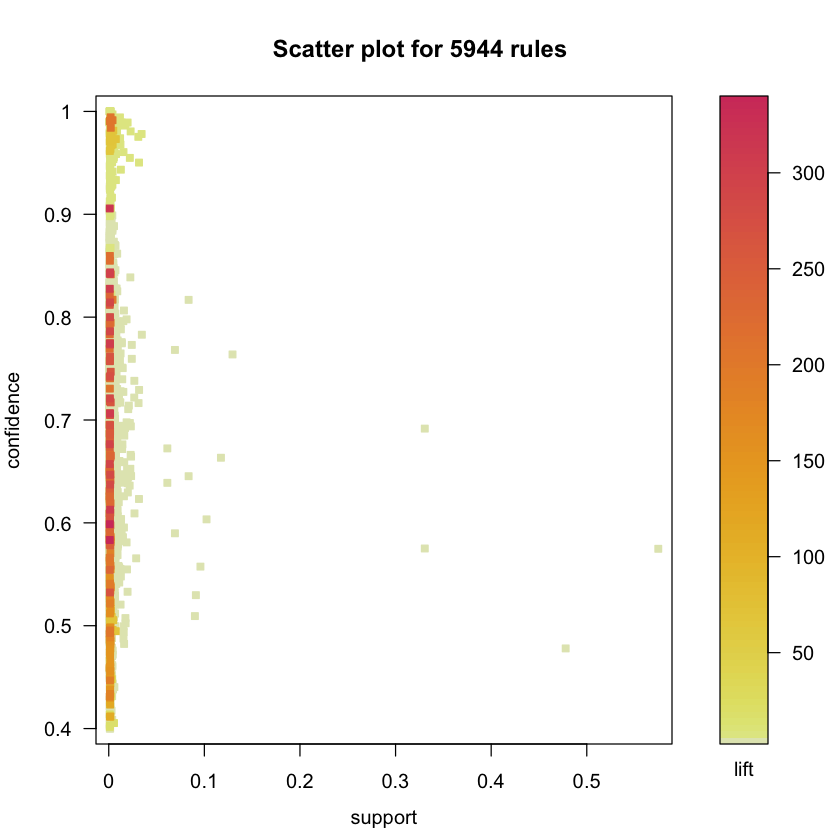

In [14]:
library(arulesViz)
plot(retail.rules)

In [16]:
retail.hi <- head(sort(retail.rules, by="lift"), 50)
inspect(retail.hi)

     lhs                 rhs    support     confidence lift    
99   {696}            => {699}  0.001032191 0.5833333  338.3410
98   {699}            => {696}  0.001032191 0.5986842  338.3410
5097 {1818,3311,795}  => {1819} 0.001088905 0.9056604  318.1069
193  {3402}           => {3535} 0.001417844 0.7062147  305.2024
194  {3535}           => {3402} 0.001417844 0.6127451  305.2024
5099 {1818,1819,795}  => {3311} 0.001088905 0.8275862  302.7455
5100 {1819,3311,795}  => {1818} 0.001088905 0.7741935  302.0108
2856 {3311,795}       => {1819} 0.001406502 0.8435374  296.2866
5098 {1818,1819,3311} => {795}  0.001088905 0.8421053  295.7836
2481 {3537,39}        => {3535} 0.001043533 0.6764706  292.3480
2482 {3535,39}        => {3537} 0.001043533 0.6571429  288.2340
2833 {1818,1819}      => {3311} 0.001293074 0.7862069  287.6082
2832 {1818,3311}      => {1819} 0.001293074 0.8142857  286.0122
2831 {3311,795}       => {1818} 0.001202332 0.7210884  281.2947
2839 {1818,1819}      => {795}  0.001315

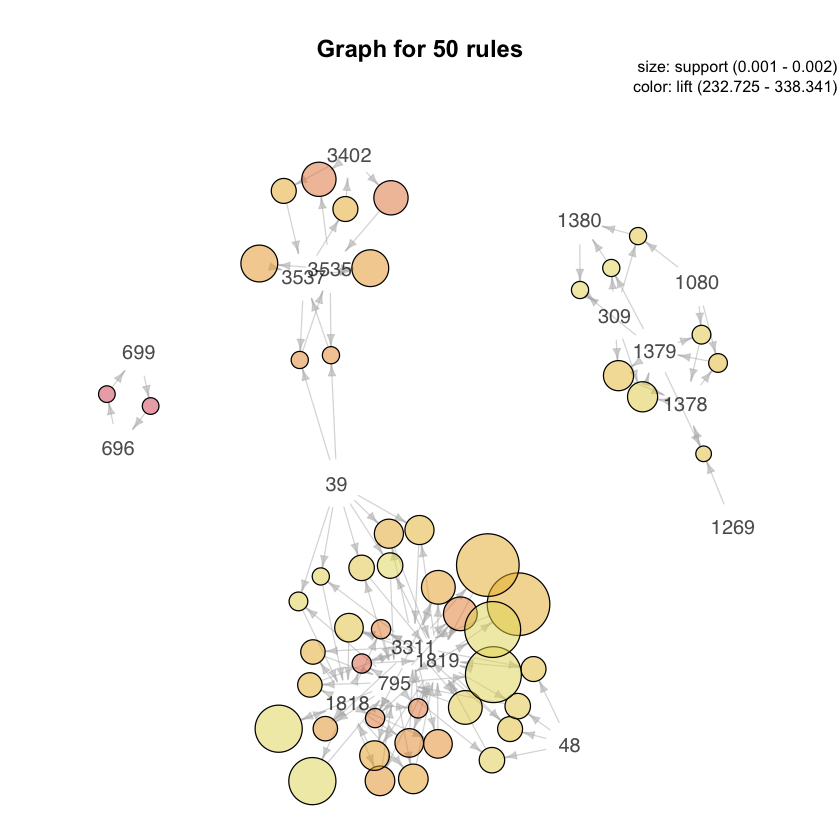

In [17]:
plot(retail.hi, method="graph", control=list(type="items"))

In [18]:
retail.itemnames <- sort(unique(unlist(as(retail.trans, "list"))))
head(retail.itemnames); tail(retail.itemnames)

[1] "0"     "1"     "10"    "100"   "1000"  "10000"

[1] "9994" "9995" "9996" "9997" "9998" "9999"

In [19]:
set.seed(03870)
retail.margin <- data.frame(margin=rnorm(length(retail.itemnames), mean=0.30, sd=0.30))
quantile(retail.margin$margin)

0%        25%        50%        75%       100% 
-1.1090452  0.1045897  0.3026245  0.5050533  1.5542344

In [20]:
rownames(retail.margin) <- retail.itemnames
head(retail.margin); tail(retail.margin)

,margin
0,0.8834036
1,0.5296409
10,0.2211481
100,-0.03793804
1000,0.3583055
10000,0.3733429


,margin
9994,0.3931183
9995,0.1459387
9996,0.5623275
9997,0.7698083
9998,-0.4374318
9999,0.6850124


In [21]:
some(retail.margin)

,margin
12336,0.1850427
13678,0.4767761
14641,0.7026888
1506,0.6819291
15718,0.5312227
1683,0.3509359
7104,-0.09544371
7692,0.8234051
7700,0.1161235
8718,0.5727487


In [22]:
# and it also works for transactions coerced to list format
# we'll just pick transaction 3 for convenience
(basket.items <- as(retail.trans[3], "list")[[1]])
retail.margin[basket.items, ]
sum(retail.margin[basket.items, ])

[1] "33" "34" "35"

[1] 0.3817115 0.6131403 0.1979879

[1] 1.19284

In [24]:
retail.margsum <- function(items, itemMargins) {
  # Input: "items" == item names, rules or transactions in arules format
  #        "itemMargins", a data frame of profit margin indexed by name
  # Output: look up the item margins, and return the sum
  library(arules)
  
  # check the class of "items" and coerce appropriately to an item list
  if (class(items) == "rules") {
    tmp.items <- as(items(items), "list")       # rules ==> item list
  } else if (class(items) == "transactions") {
    tmp.items <- as(items, "list")              # transactions ==> item list
  } else if (class(items) == "list") {
    tmp.items <- items                          # it's already an item list!
  } else if (class(items) == "character") {
    tmp.items <- list(items)                    # characters ==> item list
  } else {
    stop("Don't know how to handle margin for class ", class(items))
  }
  # make sure the items we found are all present in itemMargins
  good.items <- unlist(lapply(tmp.items, function (x) 
                       all(unlist(x) %in% rownames(itemMargins))))
  
  if (!all(good.items)) {
    warning("Some items not found in rownames of itemMargins. ", 
            "Lookup failed for element(s):\n",
            which(!good.items), "\nReturning only good values.")
    tmp.items <- tmp.items[good.items]
  }
  
  # and add them up
  return(unlist(lapply(tmp.items, function(x) sum(itemMargins[x, ]))))
}

In [25]:
retail.margsum(c("39", "48"), retail.margin)
retail.margsum(list(t1=c("39", "45"), t2=c("31", "32")), retail.margin)
retail.margsum(retail.trans[101:103], retail.margin)
retail.margsum(retail.hi, retail.margin)

retail.margsum(c("hello", "world"), retail.margin)  # error!
retail.margsum(list(a=c("39", "45"), b=c("hello", "world"), c=c("31", "32")), 
               retail.margin)    # only the first and third are OK

[1] -0.09072725

t1        t2 
0.9664982 0.2733963

Trans101  Trans102  Trans103 
0.7171411 4.8989272 4.9470372

[1] 0.9609471 0.9609471 1.9327917 0.7084729 0.7084729 1.9327917 1.9327917
 [8] 1.1665721 1.9327917 0.4601140 0.4601140 2.1547508 2.1547508 1.2040460
[15] 1.2730060 0.3383307 0.3383307 1.2730060 1.1665721 1.2730060 1.5103146
[22] 1.2040460 0.6047887 0.6047887 1.3885313 1.3885313 1.2040460 1.5103146
[29] 0.5889969 0.7092135 1.1760208 0.5935342 1.1760208 2.1547508 0.1598438
[36] 0.7092135 0.2942760 0.6285698 1.1665721 0.5889969 0.2942760 1.5477884
[43] 0.6660436 0.1624291 0.1624291 0.5067865 0.5067865 0.5442604 0.5442604
[50] 0.6285698

Warning message:
In retail.margsum(c("hello", "world"), retail.margin): Some items not found in rownames of itemMargins. Lookup failed for element(s):
1
Returning only good values.

NULL

Warning message:
In retail.margsum(list(a = c("39", "45"), b = c("hello", "world"), : Some items not found in rownames of itemMargins. Lookup failed for element(s):
2
Returning only good values.

a         c 
0.9664982 0.2733963

### Rules in Non-Transactional Data: Exploring Segments Again

In [26]:
load("segdf-Rintro-Ch5.RData")

In [27]:
seg.fac <- seg.df

In [28]:
seg.fac$age <- cut(seg.fac$age, 
                   breaks=c(0,25,35,55,65,100), 
                   labels=c("19-24", "25-34", "35-54", "55-64", "65+"), 
                   right=FALSE, ordered_result=TRUE)
summary(seg.fac$age)

19-24 25-34 35-54 55-64   65+ 
   38    58   152    38    14

In [29]:
seg.fac$income <- cut(seg.fac$income, 
                      breaks=c(-100000, 40000, 70000, 1000000),
                      labels=c("Low", "Medium", "High"),
                      right=FALSE, ordered_result=TRUE)

seg.fac$kids <- cut(seg.fac$kids, 
                      breaks=c(0, 1, 2, 3, 100),
                      labels=c("No kids", "1 kid", "2 kids", "3+ kids"),
                      right=FALSE, ordered_result=TRUE)

summary(seg.fac)

    age         gender       income         kids       ownHome     subscribe  
 19-24: 38   Female:157   Low   : 77   No kids:121   ownNo :159   subNo :260  
 25-34: 58   Male  :143   Medium:183   1 kid  : 70   ownYes:141   subYes: 40  
 35-54:152                High  : 40   2 kids : 51                            
 55-64: 38                             3+ kids: 58                            
 65+  : 14                                                                    
       Segment   
 Moving up : 70  
 Suburb mix:100  
 Travelers : 80  
 Urban hip : 50  
                 

In [30]:
seg.trans <- as(seg.fac, "transactions")
summary(seg.trans)

transactions as itemMatrix in sparse format with
 300 rows (elements/itemsets/transactions) and
 22 columns (items) and a density of 0.3181818 

most frequent items:
subscribe=subNo   income=Medium   ownHome=ownNo   gender=Female       age=35-54 
            260             183             159             157             152 
        (Other) 
           1189 

element (itemset/transaction) length distribution:
sizes
  7 
300 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      7       7       7       7       7       7 

includes extended item information - examples:
     labels variables levels
1 age=19-24       age  19-24
2 age=25-34       age  25-34
3 age=35-54       age  35-54

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

In [31]:
# find some initial rules
seg.rules <- apriori(seg.trans, parameter=list(support=0.1, conf=0.4, target="rules"))
summary(seg.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.4    0.1    1 none FALSE            TRUE     0.1      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[22 item(s), 300 transaction(s)] done [0.00s].
sorting and recoding items ... [21 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [579 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 579 rules

rule length distribution (lhs + rhs):sizes
  1   2   3   4   5 
  8 109 263 174  25 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.171   4.000   5.000 

summary of quality measures:
    support         confidence          lift       
 Min.   :0.1000   Min.   :0.4026   Min.   :0.7941  
 1st Qu.:0.1100   1st Qu.:0.5200   1st Qu.:1.0000  
 Median :0.1300   Median :0.6522   Median :1.1002  
 Mean   :0.1632   Mean   :0.6847   Mean   :1.4715  
 3rd Qu.:0.1867   3rd Qu.:0.8421   3rd Qu.:1.4896  
 Max.   :0.8667   Max.   :1.0000   Max.   :6.0000  

mining info:
      data ntransactions support confidence
 seg.trans           300     0.1        0.4

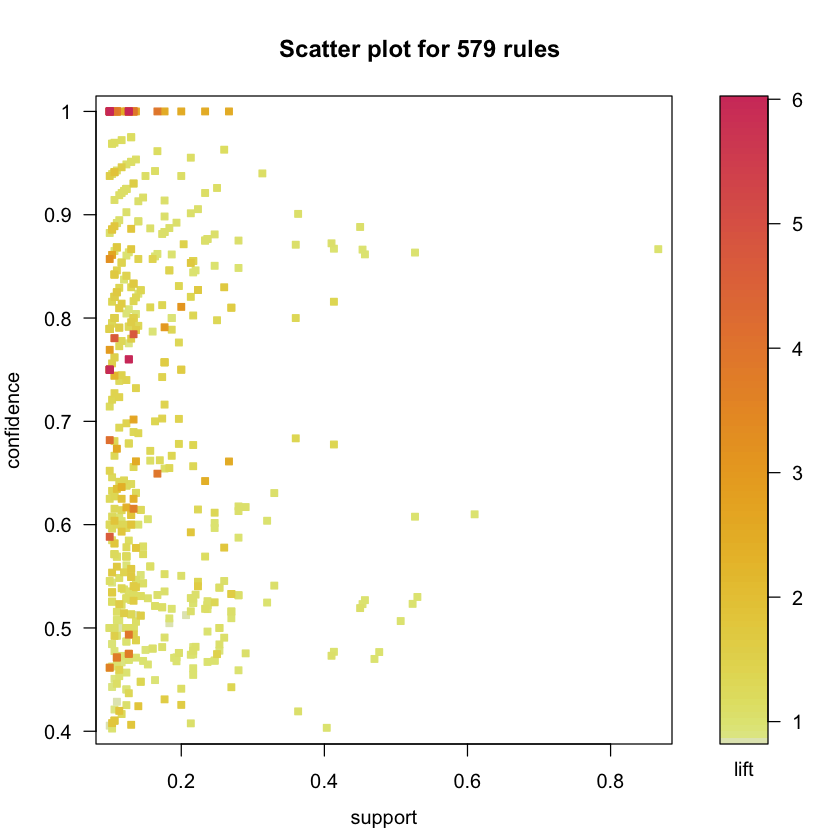

In [32]:
plot(seg.rules)

In [33]:
# examine some of the higher-lift rules
seg.hi <- head(sort(seg.rules, by="lift"), 35)
inspect(seg.hi)

   lhs                    rhs                   support confidence     lift
1  {age=19-24}         => {Segment=Urban hip} 0.1266667  1.0000000 6.000000
2  {Segment=Urban hip} => {age=19-24}         0.1266667  0.7600000 6.000000
3  {age=19-24,                                                             
    income=Low}        => {Segment=Urban hip} 0.1266667  1.0000000 6.000000
4  {income=Low,                                                            
    Segment=Urban hip} => {age=19-24}         0.1266667  0.7600000 6.000000
5  {age=19-24,                                                             
    ownHome=ownNo}     => {Segment=Urban hip} 0.1000000  1.0000000 6.000000
6  {age=19-24,                                                             
    subscribe=subNo}   => {Segment=Urban hip} 0.1000000  1.0000000 6.000000
7  {age=19-24,                                                             
    income=Low,                                                            
    ownHome=

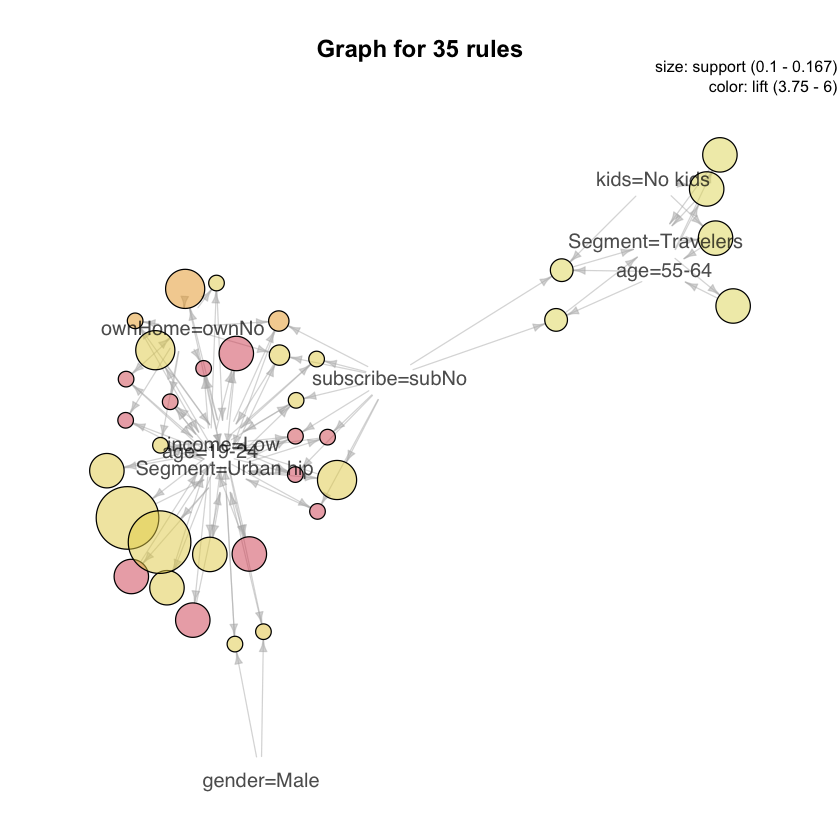

In [34]:
plot(seg.hi, method="graph", control=list(type="items")) # orientation varies

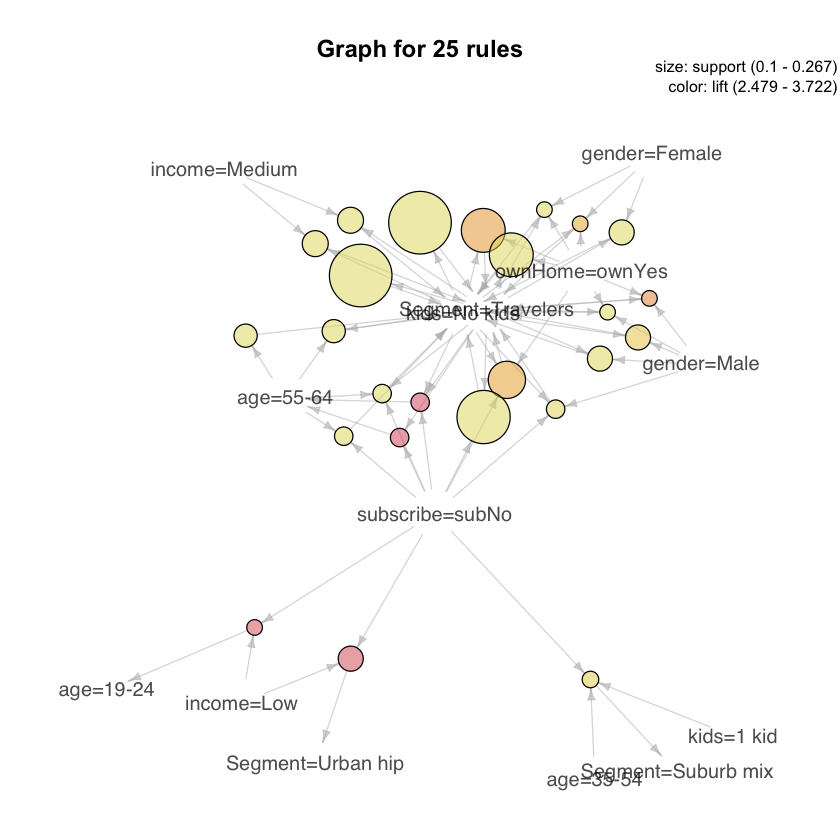

In [35]:
# continue down the list by lift
seg.next <- sort(seg.rules, by="lift")[36:60]
plot(seg.next, method="graph", control=list(type="items"))

Association rules are a powerful way to explore the relationships in a data set. The following points summarize some key suggestions from this chapter.
- Association rules are commonly used with sparse data sets that have many ob- servations but little information per observation. In marketing, this is typical of market baskets and similar transaction data. (Sect. 12.1)
- The arules package is the standard R package for association rules. arules provides support for handling sparse data and finding rules and the arulesViz package provides visualization methods.
- Core metrics for evaluating association rules are support (frequency), confi- dence (co-occurrence), and lift (co-occurrence above the rate of association by pure chance). There is no absolute value required of them except that lift should be somewhat greater than 1.0 (or possibly very much less than 1.0, showing that the non-association is unexpected, as in fraud detection). Interpretation de- pends on experience with similar data and the usefulness for a particular busi- ness question. (Sect. 12.1)
- A typical workflow for association rules (Sects. 12.2.1 and 12.2.2) is:
 - Import the raw data and use as(data, "transactions") to trans- form it to a transactions object for better performance.
 - Use apriori(transactions, support= , confidence= , target="rules") to find a set of association rules.
 - Plottheresultingrulewithplot(..., interactive=TRUE)andin- spect the rules (Sect. 12.3)
 - Look for patterns by selecting subsets of rules, such as those with high- est lift, and use plot(..., method="graph") for visualization (Sect. 12.3.1)
- Data such as item profit margin may be used to extend analyses and look at the potential business impact of acting on particular rules (Sect. 12.3.2)
- Association rule mining can also be a useful exploratory technique for mining non-transactional data such as consumer segmentation data (Sect. 12.4).
- We used R functions cut() to slice continuous data (Sect. 12.4.1) and class() to determine an object’s data type (Sect. 12.3.3)
- When you write a custom function, use warning() to report potential issues and violations of data assumptions (Sect. 12.3.3), and use stop() when a condition means that the function should not continue.